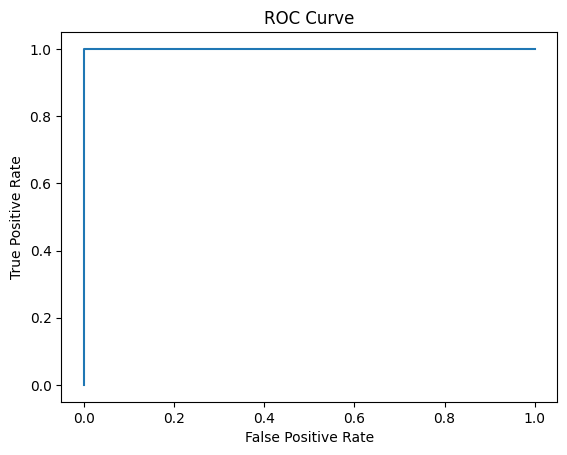

In [11]:
y_prob = rf_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.savefig("../images/roc_curve.png")
plt.show()


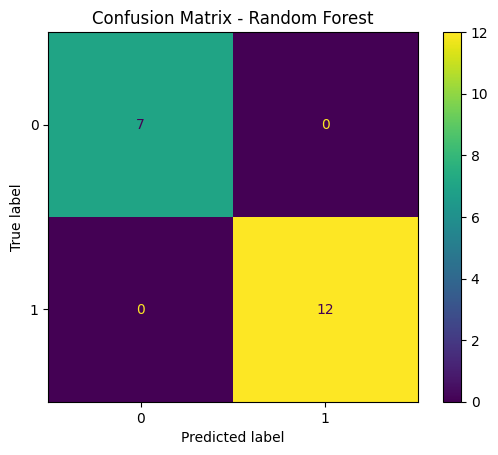

In [10]:
y_pred = rf_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.title("Confusion Matrix - Random Forest")
plt.savefig("../images/confusion_matrix.png")
plt.show()


In [9]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_acc = rf_model.score(X_test, y_test)
rf_acc


1.0

In [8]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

log_acc = log_model.score(X_test, y_test)
log_acc


1.0

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
X = df_encoded.drop("loan_approved", axis=1)
y = df_encoded["loan_approved"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:
df_encoded = df.copy()

label_cols = ["education", "employment_status"]

encoder = LabelEncoder()
for col in label_cols:
    df_encoded[col] = encoder.fit_transform(df_encoded[col])

df_encoded.head()


,age,income,education,credit_score,employment_status,loan_amount,loan_approved
0,25,35000,0,680,0,5000,0
1,32,60000,2,720,0,10000,1
2,45,52000,0,690,1,8000,1
3,29,41000,1,650,0,4000,0
4,50,80000,2,740,0,15000,1


In [4]:
df = pd.read_csv("../data/loan_data.csv")
df.head()


,age,income,education,credit_score,employment_status,loan_amount,loan_approved
0,25,35000,Bachelor,680,Employed,5000,0
1,32,60000,Master,720,Employed,10000,1
2,45,52000,Bachelor,690,Self-employed,8000,1
3,29,41000,Diploma,650,Employed,4000,0
4,50,80000,Master,740,Employed,15000,1


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import joblib
